In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
n_epochs = 5 # 模型训练 5 轮
log_interval = 30 #控制打印频率的，设 n = 30*batch_size，即n张图后打印一次进度
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 根据设备是否支持GPU来选择硬件 
size = 32 # 对输入图片进行处理，拉伸为32*32的图片，这是为了复刻手写数字识别的神经网络，其输入为32*32的灰度图像
learn_rate = 0.03 # 学习率
momentum = 0.1  # 动量

In [4]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
from torchvision.datasets import MNIST
transform = transforms.Compose(
    [ transforms.Resize(size), transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]) # 正则化处理，相当于z-score
trainset = MNIST(root = './', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = MNIST(root = './', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=2)

# classes = ('1', '2', '3', '4', '5', '6', '7', '8', '9', '0')

--2024-03-30 12:50:09--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
正在解析主机 www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
正在连接 www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://www.di.ens.fr/~lelarge/MNIST.tar.gz [跟随至新的 URL]
--2024-03-30 12:50:12--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
正在连接 www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：未指定 [application/x-gzip]
正在保存至: “MNIST.tar.gz.9”

MNIST.tar.gz.9          [             <=>    ]  33.20M  1.02MB/s  用时 52s       

2024-03-30 12:51:18 (654 KB/s) - “MNIST.tar.gz.9” 已保存 [34813078]

x MNIST/
x MNIST/raw/
x MNIST/raw/train-labels-idx1-ubyte
x MNIST/raw/t10k-labels-idx1-ubyte.gz
x MNIST/raw/t10k-labels-idx1-ubyte
x MNIST/raw/t10k-images-idx3-ubyte.gz
x MNIST/raw/train-images-idx3-ubyte
x MNIST/raw/train-labels-idx1-ubyte.gz
x MNIST/raw/t10k-images-idx3-ubyte
x MNIST/raw/train-images-idx3-ubyte.gz
x MNIST/processed/
x MNIST/processed/training.pt

In [5]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)
print(example_data.shape)

tensor([9, 0, 9, 5, 3, 5, 2, 3, 6, 5, 9, 5, 9, 3, 6, 9, 3, 7, 0, 0, 6, 3, 6, 6,
        7, 5, 9, 3, 3, 4, 6, 2, 2, 2, 9, 3, 9, 4, 6, 6, 0, 4, 0, 9, 9, 0, 4, 3,
        8, 2, 7, 4, 1, 2, 0, 3, 9, 0, 9, 5, 6, 8, 8, 3, 3, 0, 5, 9, 7, 1, 2, 1,
        2, 1, 3, 2, 3, 5, 7, 7, 8, 7, 1, 8, 3, 0, 9, 5, 5, 9, 9, 7, 8, 0, 7, 4,
        0, 9, 8, 1, 9, 4, 9, 2, 6, 9, 1, 7, 9, 2, 4, 4, 5, 7, 4, 0, 5, 8, 8, 1,
        1, 4, 5, 7, 5, 4, 7, 8, 0, 7, 3, 1, 6, 8, 5, 3, 2, 6, 9, 4, 1, 5, 2, 2,
        8, 7, 1, 6, 0, 6, 6, 9, 4, 4, 0, 7, 2, 9, 8, 5, 6, 2, 8, 0, 8, 8, 7, 0,
        0, 0, 7, 0, 1, 5, 5, 2, 4, 1, 9, 5, 8, 6, 0, 7, 4, 4, 6, 0, 4, 9, 7, 3,
        3, 3, 7, 0, 3, 6, 1, 4, 5, 2, 2, 6, 7, 4, 5, 6, 6, 3, 6, 7, 1, 1, 1, 1,
        2, 6, 7, 9, 3, 4, 3, 0, 0, 6, 2, 4, 6, 1, 1, 3, 4, 3, 1, 7, 1, 1, 4, 1,
        4, 9, 0, 5, 1, 4, 8, 4, 6, 4, 3, 3, 9, 6, 1, 7, 1, 1, 2, 1, 2, 7, 5, 1,
        2, 0, 9, 0, 8, 3, 0, 1, 8, 1, 2, 9, 1, 3, 6, 0, 9, 1, 7, 7, 0, 7, 4, 8,
        1, 6, 0, 1, 2, 6, 3, 4, 9, 7, 6,

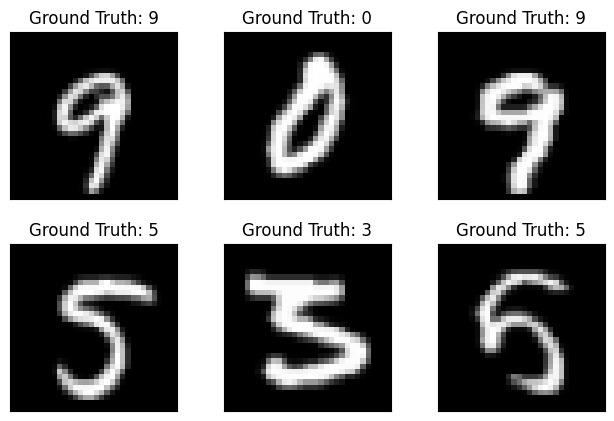

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)  # 在输出层添加softmax函数

network = LeNet().to(DEVICE)
optimizer = optim.SGD(network.parameters(), lr=learn_rate, momentum=momentum)

In [8]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(trainloader.dataset) for i in range(n_epochs + 1)] #test_losses为横坐标，test_losses为纵坐标
test_acc = []

In [9]:
def train(epoch, device):
  network.train() # 调用上一步实例化对象network中的方法（该方法包内已经写好）
  for batch_idx, (data, target) in enumerate(trainloader): # 按batch_size为集合对象进行逐个处理
    data, target = data.to(device), target.to(device) # data是图片，target是标签，device是为了有GPU情况下使用GPU加速
    optimizer.zero_grad() # 开始进行BP之前将梯度设置为零，因为PyTorch会在随后的BP中累积梯度
    output = network(data) 
    loss = F.nll_loss(output, target) # 函数全称是negative log likelihood loss，下面博客有详细解释
    # https://blog.csdn.net/weixin_38145317/article/details/103288032
    loss.backward() # 根据误差进行BP
    optimizer.step()
    if batch_idx % log_interval == 0: # 控制输出频率
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
      train_losses.append(loss.item()) # 记录并储存train loss
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))

In [10]:
def test(device):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in testloader:
      data, target = data.to(device), target.to(device)
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1] # 找到概率最大的下标，为预测类别
      correct += pred.eq(target.data.view_as(pred)).sum() # x下面都是记录数据用于绘图，不再解释
  test_loss /= len(testloader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(testloader.dataset),
    100. * correct / len(testloader.dataset)))
  test_acc.append(correct / len(testloader.dataset))

/opt/anaconda3/envs/swy_py38/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3063, Accuracy: 1009/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304971
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.289562
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.297636
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.286538
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.277272
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.268843
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.210742
Train Epoch: 1 [13440/60000 (22%)]	Loss: 2.104086
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.515828
Train Epoch: 1 [17280/60000 (29%)]	Loss: 1.036206
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.395850
Train Epoch: 1 [21120/60000 (35%)]	Loss: 0.285476
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.628802
Train Epoch: 1 [24960/60000 (42%)]	Loss: 0.342907
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.242527
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.121243
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.211450
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.144874
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.128881
Trai

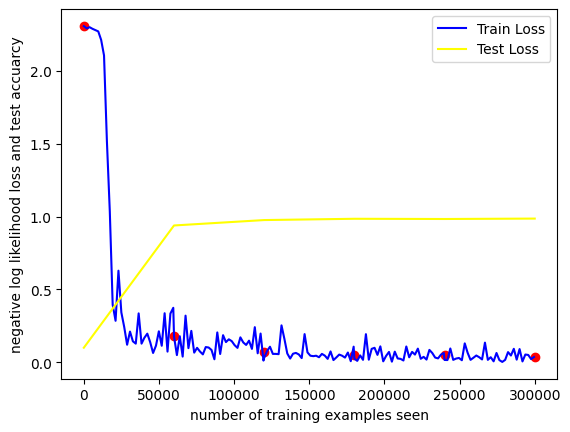

In [11]:
test(DEVICE)
for epoch in range(1, n_epochs + 1):
  train(epoch, DEVICE)
  test(DEVICE)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue') # train_losses变化曲线
plt.plot(test_counter, test_acc, color='yellow') # test集accuracy变化曲线
plt.scatter(test_counter, test_losses, color='red') # test集loss散点图
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss and test accuarcy')
plt.show()

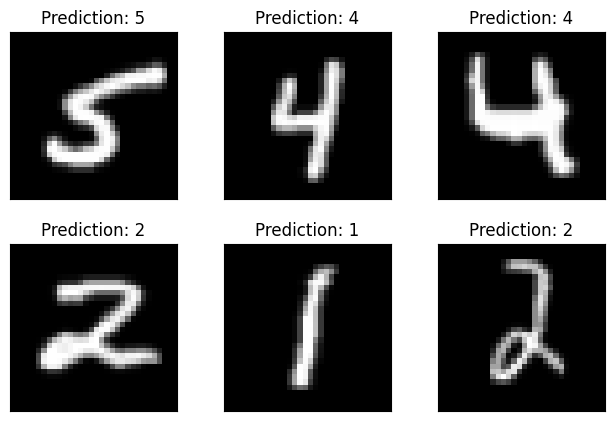

In [12]:
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
with torch.no_grad():
  example_data, example_targets = example_data.to(DEVICE), example_targets.to(DEVICE)
  output = network(example_data)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu().clone().numpy(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

Accuracy: 0.5


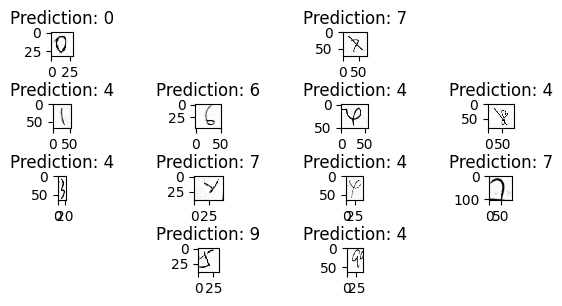

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 初始化计数器
total_images = 0
correct_predictions = 0

# 1. 遍历文件夹中的所有以png结尾的文件
image_folder = "/Users/songwenyan/FudanCourses/ML-DL/DeepLearning/手写体识别（Pytorch)/data/Test"
fig = plt.figure()

# 使用os.scandir获取迭代器
for i, filename in enumerate(os.scandir(image_folder), start=1):
    if ".png" in filename.name:
        image_path = os.path.join(image_folder, filename)
        answer = filename.name.split('.')[0].split('-')[-1]
        
        # 添加子图
        plt.subplot(6, 4, i)
        
        # 加载图像并进行预处理
        image = Image.open(image_path).convert("L")  # 转换为灰度图像
        transform = transforms.Compose([
            transforms.Resize((32, 32)),  # 调整大小为模型所需的输入尺寸
            transforms.ToTensor(),         # 转换为张量
            transforms.Normalize((0.5), (0.5))  # 归一化
        ])
        input_image = transform(image).unsqueeze(0)  # 添加一个维度以匹配模型的输入形状

        # 2. 将图像输入模型进行推理
        output = network(input_image.to(DEVICE))
        predicted_class = output.argmax(dim=1).item()  # 获取预测的类别

        # 输出预测结果
        plt.imshow(image, cmap='gray', interpolation='none')
        plt.title(f"Prediction: {predicted_class}")
            
        # 统计正确预测数量
        total_images += 1
        if str(predicted_class) == answer:
            correct_predictions += 1
    else:
        continue

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=1.0, hspace=2.0)

# 计算正确率
accuracy = correct_predictions / total_images
print("Accuracy:", accuracy)
plt.show()
 

In [15]:
import cv2
import torch
from torchvision import transforms
from PIL import Image

# 加载模型和预处理
model = network.eval()
transform = transforms.Compose([
    transforms.Grayscale(),  # 转换为灰度图像
    transforms.Resize((32, 32)),  # 调整大小为模型所需的输入尺寸
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化
])

# 打开摄像头
cap = cv2.VideoCapture(0)
while True:
    # 读取一帧
    ret, frame = cap.read()
    if not ret:
        break

    # 将OpenCV图像转换为PIL图像
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # 预处理图像
    input_image = transform(pil_image).unsqueeze(0)

    # 识别手写字体
    with torch.no_grad():
        output = model(input_image)

    # 获取预测的类别
    predicted_class = output.argmax(dim=1).item()

    # 在图像中显示识别结果
    cv2.putText(frame, str(predicted_class), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # 显示图像
    cv2.imshow('Handwritten Digit Recognition', frame)

    # 检测按键
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

# 释放摄像头并关闭窗口
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 